In [41]:
import pandas as pd

In [3]:
df=pd.read_csv('data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Problem Statement:

### Analyse the data set that will help in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves.Build a model that will help predict one's chances of admission given the rest of the variables.

In [4]:
df.shape

(500, 9)

Now,let us drop the irrelevant column and check if there are any null values in the dataset

In [5]:
df=df.drop(['Serial No.'],axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Lets see the distribution of the variables of graduate applicants.

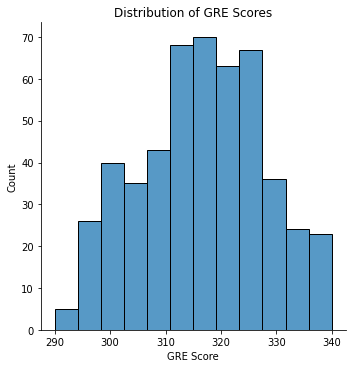

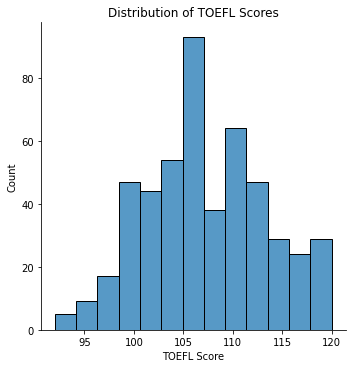

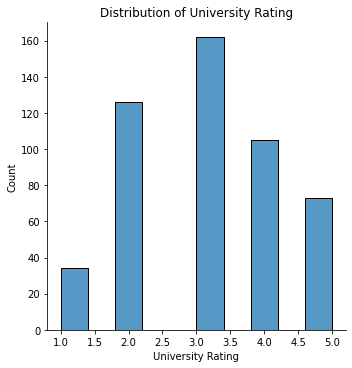

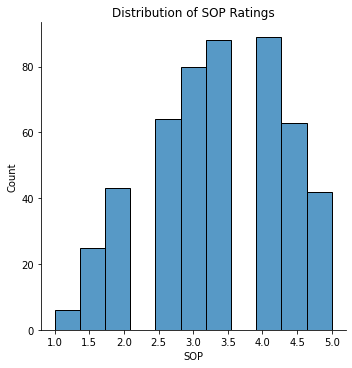

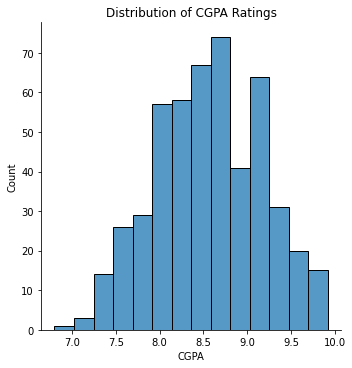

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=sns.displot(df['GRE Score'],kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig=sns.displot(df['TOEFL Score'],kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig=sns.displot(df['University Rating'],kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig=sns.displot(df['SOP'],kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig=sns.displot(df['CGPA'],kde=False)
plt.title("Distribution of CGPA Ratings")
plt.show()

plt.show()



It is clear from the distributions, students with varied merit apply for the university.


**Understanding the relation between different factors responsible for graduate admissions**

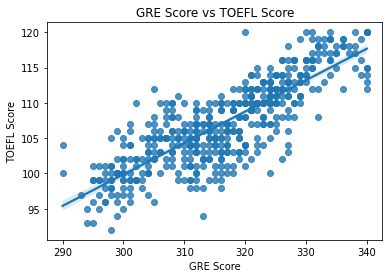

In [8]:
fig = sns.regplot(x="GRE Score",y="TOEFL Score",data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

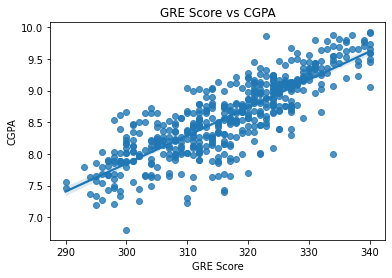

In [9]:
fig = sns.regplot(x="GRE Score",y="CGPA",data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

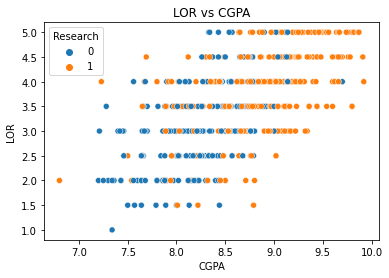

In [10]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("LOR vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

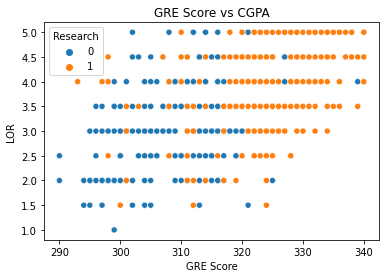

In [11]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

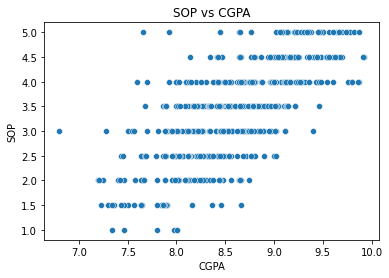

In [12]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("SOP vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

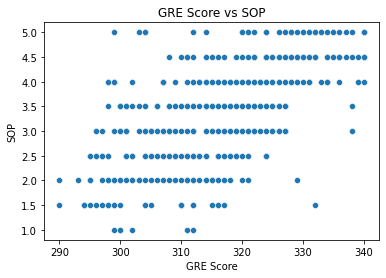

In [13]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()

Similary, GRE Score and SOP is only slightly related

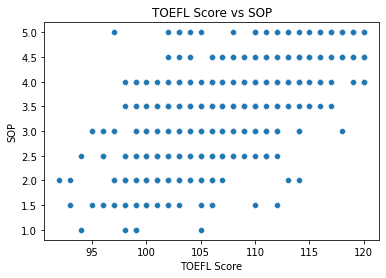

In [14]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOEFL Score vs SOP")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

## **Correlation among variables**

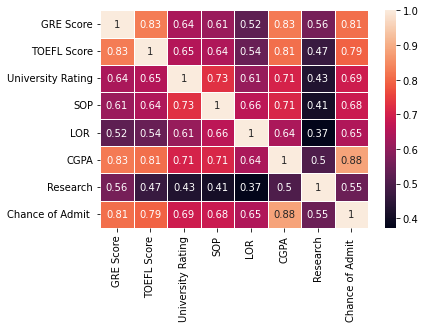

In [15]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

Lets split the dataset with training and testing set and prepare the inputs and outputs

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,shuffle=True)

In [18]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
195,307,107,2,3.0,3.5,8.52,1
233,304,100,2,2.5,3.5,8.07,0
351,325,110,4,3.5,4.0,8.67,1
144,325,112,2,3.0,3.5,8.96,1
213,333,119,5,5.0,4.5,9.78,1
...,...,...,...,...,...,...,...
269,308,108,4,4.5,5.0,8.34,0
458,312,100,1,3.0,3.0,8.53,1
333,319,108,3,3.0,3.5,8.54,1
451,324,113,4,4.5,4.5,9.25,1


In [19]:
y_train

195    0.78
233    0.64
351    0.73
144    0.80
213    0.96
       ... 
269    0.77
458    0.69
333    0.71
451    0.89
353    0.63
Name: Chance of Admit , Length: 400, dtype: float64

In [20]:
# Standarization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [21]:
X_train_std

array([[-0.79159464, -0.00570796, -0.96690042, ...,  0.03308502,
        -0.05965866,  0.90911166],
       [-1.05234501, -1.14730069, -0.96690042, ...,  0.03308502,
        -0.79017291, -1.09997489],
       [ 0.77290754,  0.48354606,  0.7752625 , ...,  0.56244542,
         0.18384609,  0.90911166],
       ...,
       [ 0.25140681,  0.15737671, -0.09581896, ...,  0.03308502,
        -0.02719136,  0.90911166],
       [ 0.68599075,  0.97280009,  0.7752625 , ...,  1.09180581,
         1.12539778,  0.90911166],
       [-1.40001216, -0.82113134, -0.09581896, ..., -1.02563576,
        -0.62783641, -1.09997489]])

In [22]:
X_train=pd.DataFrame(X_train_std,columns=X_train_columns)

In [23]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.791595,-0.005708,-0.966900,-0.381799,0.033085,-0.059659,0.909112
1,-1.052345,-1.147301,-0.966900,-0.884165,0.033085,-0.790173,-1.099975
2,0.772908,0.483546,0.775263,0.120568,0.562445,0.183846,0.909112
3,0.772908,0.809715,-0.966900,-0.381799,0.033085,0.654622,0.909112
4,1.468242,1.951308,1.646344,1.627668,1.091806,1.985781,0.909112
...,...,...,...,...,...,...,...
395,-0.704678,0.157377,0.775263,1.125301,1.621166,-0.351864,-1.099975
396,-0.357011,-1.147301,-1.837982,-0.381799,-0.496275,-0.043425,0.909112
397,0.251407,0.157377,-0.095819,-0.381799,0.033085,-0.027191,0.909112
398,0.685991,0.972800,0.775263,1.125301,1.091806,1.125398,0.909112


Lets use a bunch of different algorithms to see which model performs better

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],
         
          ['Lasso Regression :', Lasso(alpha=0.1)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results without removing features with multicollinearity ...
Linear Regression : 0.06574701097298369
Lasso Regression : 0.11866366473264615
Ridge Regression : 0.06573068447794275


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


## Linear Regression using Statsmodel library

In [25]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train.values,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     278.6
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          7.11e-148
Time:                        22:41:55   Log-Likelihood:                 571.40
No. Observations:                 400   AIC:                            -1127.
Df Residuals:                     392   BIC:                            -1095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7184      0.00

In [26]:
X_train_new=X_train.drop(columns='SOP')

In [27]:
model1=sm.OLS(y_train.values,X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     325.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.85e-149
Time:                        22:42:14   Log-Likelihood:                 571.15
No. Observations:                 400   AIC:                            -1128.
Df Residuals:                     393   BIC:                            -1100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7184      0.00

## VIF(Variance Inflation Factor)

-  VIF score of an independent variable represents how well the variable is explained by other independent variables. 

- So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
    dataset=dataset.drop(columns=col,axis=1)
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [29]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.450032
2,TOEFL Score,4.022025
3,University Rating,2.157060
4,LOR,1.935188
5,CGPA,4.393716
6,Research,1.510150


### VIF looks fine and hence, we can go ahead with the predictions

In [30]:
X_test_std=std.transform(X_test)

In [31]:
X_test=pd.DataFrame(X_test_std,columns=X_train_columns)

In [32]:
X_test=sm.add_constant(X_test)

In [33]:
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [34]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [35]:
X_test_new=X_test.drop(columns=X_test_del)

In [42]:
#Prediction from the clean model
pred=model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ',mean_absolute_error(y_test.values,pred))
print('Root Mean Square Error ',np.sqrt(mean_squared_error(y_test.values,pred)))
print('R2 Score ',r2_score(y_test.values,pred))

Mean Absolute Error  0.045469317027565605
Root Mean Square Error  0.06562347130264569
R2 Score  0.7709218583004861


## Mean of Residuals

In [37]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.0036893548274747018


## Test for Hommoscedasticity

(0.0, 1.0)

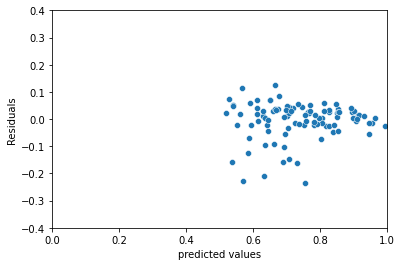

In [38]:
import seaborn as sns
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
#p = sns.lineplot([0,26],[0,0],color='blue')
#p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [39]:
import statsmodels.stats.api as sns
from statsmodels.compat import lzip
name=['F statistics','p-value']
test=sns.het_goldfeldquandt(residuals,X_test)
lzip(name,test)

[('F statistics', 2.1139760855427285), ('p-value', 0.008559995643444451)]

#### Here `null hypothesis` is - error terms are homoscedastic and since p-values <0.05, we  reject the null hypothesis 

## Normality of residuals

In [38]:
# sns.displot(x=residuals,kde=True)
# plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

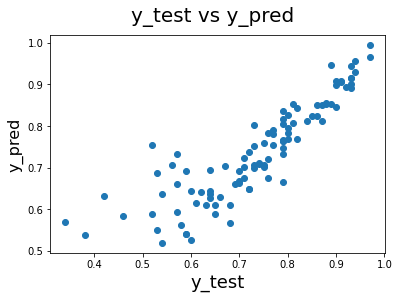

In [40]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Actionable Insights & Recommendations

- Bias is as a result of over simplified model assumptions
- Variance occurs when the assumptions are too complex

- The more preferred model is one with low bias and low varinace.

- Dimensionality reduction and feature selection can decrease variance by simplifying models. 

- Similarly, a larger training set tends to decrease variance.

- For reducing Bias: Change the model, Ensure the date is truly representative(Ensure that the training data is diverse and represents all possible groups or outcomes.), Parameter tuning.

- The bias–variance decomposition forms the conceptual basis for regression regularization methods such as Lasso and ridge regression. 

- Regularization methods introduce bias into the regression solution that can reduce variance considerably relative to the ordinary least squares (OLS) solution. 

- Although the OLS solution provides non-biased regression estimates, the lower variance solutions produced by regularization techniques provide superior MSE performance. 

- Linear and Generalized linear models can be regularized to decrease their variance at the cost of increasing their bias.